Import der lightkurve Bibliothek sowie der matplotlib, numpy, scipy und astropy Bibliotheken, die später optinal für Berechnungen verwendet werden.

In [1]:
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import astropy as ap
import math
%matplotlib inline

Suche nach einem Target, hier DD Dra

In [2]:
search_result=lk.search_lightcurve(target="DD Dra", mission="TESS",cadence=120)
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 20,2019,SPOC,120,233539736,0.0
1,TESS Sector 14,2019,SPOC,120,233539736,0.0
2,TESS Sector 15,2019,SPOC,120,233539736,0.0
3,TESS Sector 16,2019,SPOC,120,233539736,0.0
4,TESS Sector 17,2019,SPOC,120,233539736,0.0
5,TESS Sector 18,2019,SPOC,120,233539736,0.0
6,TESS Sector 19,2019,SPOC,120,233539736,0.0
7,TESS Sector 25,2020,SPOC,120,233539736,0.0
8,TESS Sector 24,2020,SPOC,120,233539736,0.0


Download einer Lichtkurve aud der Liste oben

In [3]:
lc = search_result[24].download()
lc

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
2910.26423280268,———,———,-2.4530658e-04,1211623,930.71988,1677.03139,1.0970189e+04,1.5751112e+01,5.7810698e+03,7.3885236e+00,———,———,1000000000000,———,———,———,———,930.71988,1.1110494e-03,1677.03139,1.1504515e-03,2.3333723e-02,8.2745813e-02
2910.2656216706773,———,———,-2.4532684e-04,1211624,930.72304,1677.03505,1.0980979e+04,1.5813416e+01,5.8777080e+03,7.4399204e+00,———,———,1000000000000,———,———,———,———,930.72304,1.1160308e-03,1677.03505,1.1551053e-03,2.5833867e-02,8.7562174e-02
2910.2670105386737,———,———,-2.4534710e-04,1211625,930.71977,1677.03065,1.0926667e+04,1.5862900e+01,5.9845459e+03,7.4996824e+00,———,———,1000000000000,———,———,———,———,930.71977,1.1225536e-03,1677.03065,1.1658670e-03,2.0286808e-02,8.1050120e-02
2910.2683994066406,———,———,-2.4536738e-04,1211626,930.71896,1677.02907,1.0944605e+04,1.5920424e+01,6.0699897e+03,7.5508661e+00,———,———,1000000000000,———,———,———,———,930.71896,1.1273118e-03,1677.02907,1.1678598e-03,2.2036405e-02,8.0889985e-02
2910.2697882746374,———,———,-2.4538764e-04,1211627,930.72068,1677.03207,1.0896401e+04,1.5970955e+01,6.1796748e+03,7.6081538e+00,———,———,1000000000000,———,———,———,———,930.72068,1.1364631e-03,1677.03207,1.1779179e-03,2.2524230e-02,8.5629053e-02
2910.2711771426343,———,———,-2.4540789e-04,1211628,930.71693,1677.03359,1.0896677e+04,1.6024237e+01,6.2604253e+03,7.6564713e+00,———,———,1000000000000,———,———,———,———,930.71693,1.1411140e-03,1677.03359,1.1841276e-03,2.1183131e-02,8.5503317e-02
2910.272566010574,———,———,-2.4542821e-04,1211629,930.71999,1677.03012,1.0882077e+04,1.6084070e+01,6.3589141e+03,7.7182879e+00,———,———,1000000000000,———,———,———,———,930.71999,1.1463379e-03,1677.03012,1.1915625e-03,2.3257023e-02,8.2056642e-02
2910.2739548785116,———,———,-2.4544852e-04,1211630,930.72349,1677.03749,1.0822499e+04,1.6120655e+01,6.4511753e+03,7.7717972e+00,———,———,1000000000000,———,———,———,———,930.72349,1.1552148e-03,1677.03749,1.1998552e-03,2.5724951e-02,8.9604035e-02


Plotten der Lichtkurve als ganzes

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

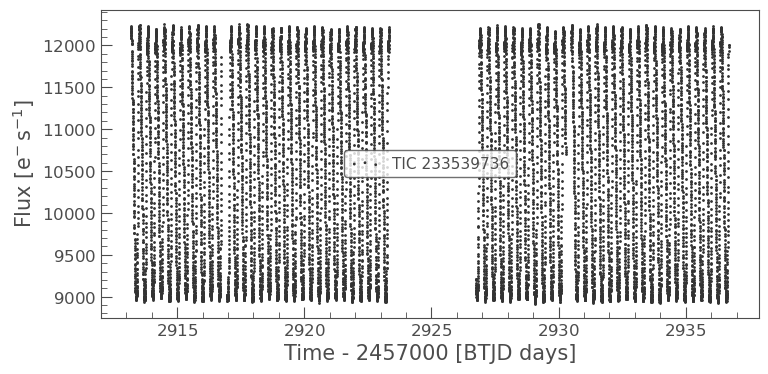

In [4]:
lc.scatter()

oder abschnittweise durch Angabe von Indices

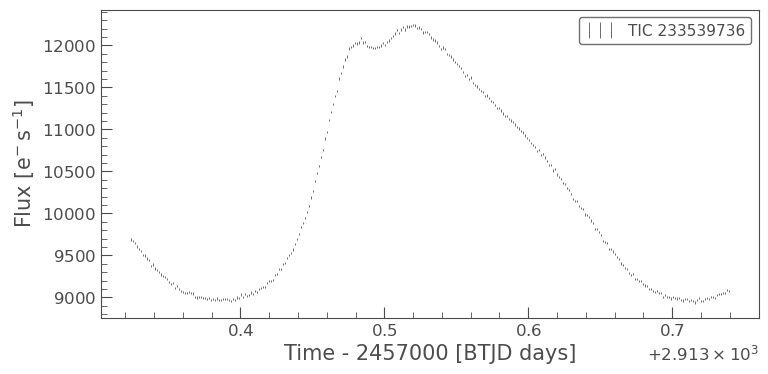

In [5]:
lc[2200:2500].errorbar();

Diese Lichtkurve kann in die bei der BAV übliche Form umgerechtnet werden.
Zwischen dem Fluss und der Magnitude besteht die Beziehung

In [6]:
def tess_mag(flux):
    return -2.5*np.log10(flux)+20.44

def tess_mag_err(flux,flux_err):
    return 2.5/np.log(10)*1/flux*flux_err

Die Zeitangaben sind in Baryzentrischem Julianischem Datum. Wir verwenden Astropy. um die Differenz zwischen BTJD und HJD abzuschätzen

In [7]:
dd_dra=ap.coordinates.SkyCoord("18 44 04.61" "+60 46 12.8",unit=(ap.units.hourangle, ap.units.deg), frame='icrs')
greenwich = ap.coordinates.EarthLocation.of_site('greenwich') 
ref_time = ap.time.Time(59913.5, format='mjd',scale='utc', location=greenwich)
ltt_bary = ref_time.light_travel_time(dd_dra)  
ltt_helio =  ref_time.light_travel_time(dd_dra, "heliocentric") 
(ltt_bary-ltt_helio).to(ap.units.s)


<Quantity -0.33731299 s>

Die Differenz ist weniger als eine Sekúnde und kann für viele praktische Zwecke vernachlässigt werden. Wir nehmen hier daher an BTJD = HJD

Erstellung einer BAV Lichtkurve und Bestimmung der Maximumszeitpunkte für einen Teilbereich

Aufbau eines Numpy array, das die Zeit als HJD, die Magnitude und deren Fehler enthält. Dabei berücksichtigen, dass die Größen in lightkurve mit Einheiten behaftet sind.

In [8]:
len=lc[2200:2500].time.shape[0]

In [9]:
lcm=np.empty((len,3))
lcm[:,0]=lc[2200:2500].time.jd
lcm[:,1]=tess_mag(lc[2200:2500].flux.value)
lcm[:,2]=tess_mag_err(lc[2200:2500].flux.value,lc[2200:2500].flux_err.value)

Vorbereiten von Fourierfit und Plot

In [10]:
t0=int(lcm[0,0])
t=lcm[:,0]-t0
mag=lcm[:,1]
merr=lcm[:,2]

Fourierfit und Bestimmung der Extrema

In [11]:
p=0.326750
w=2*math.pi/p
k=8
C=np.stack([np.sin(i*w*t) for i in range(1,k+1)])
B=np.stack([np.cos(i*w*t) for i in range(k+1)])
A=np.concatenate((B,C)).T
coeff = np.linalg.lstsq(A,mag,rcond=None)[0]

In [12]:
def lc_fourier(t,w,coeff):
    n=coeff.shape[0]
    mag=0
    k=int((n-1)/2)
    for i in range(0,k+1):
        mag=mag+coeff[i]*np.cos(i*w*t)
    for i in range(k+1,n):
        mag=mag+coeff[i]*np.sin((i-k)*w*t)
    return mag

In [13]:
t_step=np.linspace(min(t),max(t),1000)

In [14]:
x=lc_fourier(t_step,w,coeff)

Die SciPy Funktion argrelmin/max wird verwendet, die Maxima / Minima zu lokalisieren. Dazu wurde mit x eine Zetreihe erzeugt mit 1000 Schritten im Zeitbereich dr Beobachtung, die dann von den Funktionen durchsucht wird. Das Ergebnis der Suche ist eine Liste der Indices in der Zeitreihe, an denen sich Minima / Maxima finden.

In [15]:
ind=sp.signal.argrelmin(x)
ind1=sp.signal.argrelmax(x)

Damit kann man jetzt eine "klassische" BAV Lichttkurve erstellen

Text(0, 0.5, 'Magnitude')

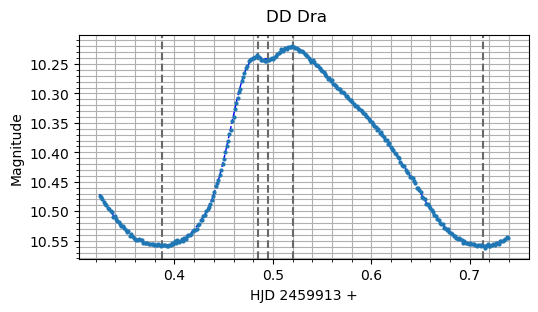

In [16]:
fig, ax = plt.subplots(1,1,height_ratios=[1],figsize=(5.8,2.9))
fig.suptitle("DD Dra",x=0.5,y=0.97,ha="center")
ax.clear()
ax.errorbar(t,mag,yerr=merr,elinewidth=0.5,marker="o",ms=2,linestyle="none")
ax.plot(t_step,lc_fourier(t_step,w,coeff),"b--",linewidth=1)  
for i in ind[0]:
    ax.axvline(t_step[i],0,1,color='dimgrey',ls="--")
for i in ind1[0]:
    if i>100:
        ax.axvline(t_step[i],0,1,color='dimgrey',ls="--")
ax.invert_yaxis()
ax.minorticks_on()
ax.grid(visible=True,which="both")
ax.set_xlabel("HJD "+'%-8.0f'%(int(t0))+"+")
ax.set_ylabel("Magnitude")

Die Zeiten der Maxima sind

In [17]:
t_step[ind]

array([0.4847787 , 0.52052785])

Erzeugen eines Periodogramms, um die Periode aus den TESS BEobachtungen zu bestimmmen. Die Parameter im Funktionsaufruf, insbesondere minimum_period und maximumm_period iúnd oversample_factor sind je nach Aufgabe mit Bedacht zu wählen, Hier geht es um eine möglichst genaue Bestimmung der Grundfrequenz, daher ein hohes oversampling.

<Axes: xlabel='Period [$\\mathrm{d}$]', ylabel='Power [$\\mathrm{\\frac{e^{-}}{s}}$]'>

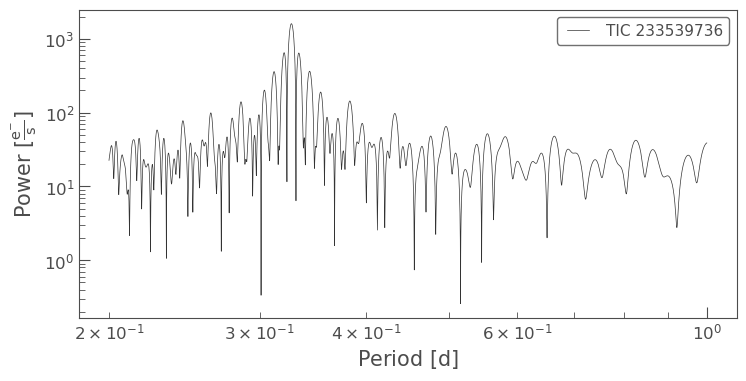

In [27]:
pg = lc.to_periodogram(method="ls",minimum_period=0.2,maximum_period=1,oversample_factor=100)
pg.plot(view="period",scale="log")

In [28]:
pg.period_at_max_power

<Quantity 0.32682753 d>